In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

In [61]:
meta_data = pd.read_csv('dataset/HAM10000_metadata.csv')

meta_data.describe(include='all')


,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [62]:
meta_data = meta_data[meta_data['age'].notna()]
meta_data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,9958,9958,9958,9958,9958.000000,9958,9958
unique,7418,9958,7,4,NaN,3,15
top,HAM_0000835,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6660,5332,NaN,5400,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


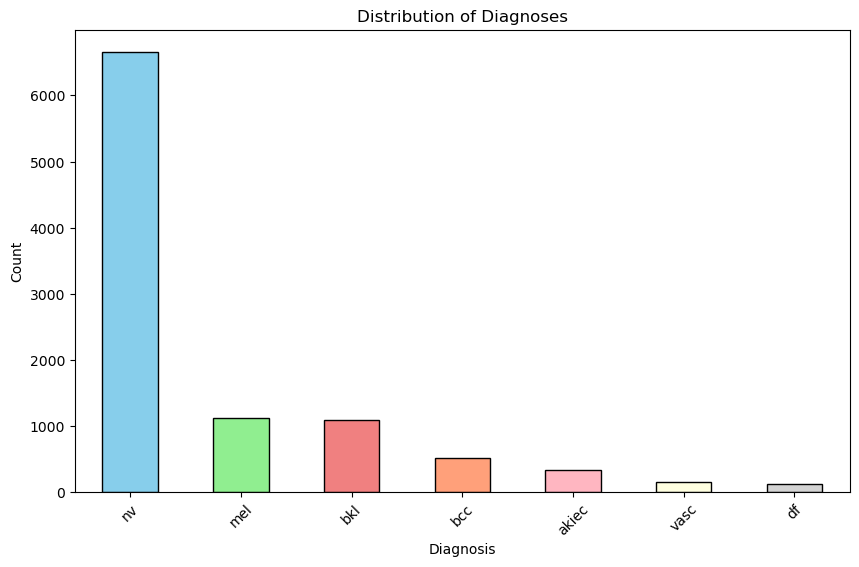

In [63]:
def plot_diagnosis(meta_data):
    dx_counts = meta_data['dx'].value_counts()
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightyellow', 'lightgray']
    
    dx_counts.plot(kind='bar', color=colors, edgecolor='black', figsize=(10, 6))
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title('Distribution of Diagnoses')
    plt.xticks(rotation=45)
    plt.show()

# Call the function with meta_data
plot_diagnosis(meta_data)


In [64]:
def add_diagnosis(meta_data):
    meta_data['dx'] = meta_data['dx'].astype('category')
    meta_data['dx_id'] = meta_data['dx'].cat.codes
    malignant = {'akiec', 'bcc', 'mel'}
    
    meta_data['diagnosis'] = np.where(meta_data['dx'].isin(malignant), 1, 0)
    
    return meta_data

meta_data = add_diagnosis(meta_data)

In [65]:
def encode_dx(meta_data):
    meta_data['dx'] = meta_data['dx'].astype('category')
    meta_data['dx'] = meta_data['dx'].cat.codes
    return meta_data

encode_dx(meta_data)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_id,diagnosis
0,HAM_0000118,ISIC_0027419,2,histo,80.0,male,scalp,2,0
1,HAM_0000118,ISIC_0025030,2,histo,80.0,male,scalp,2,0
2,HAM_0002730,ISIC_0026769,2,histo,80.0,male,scalp,2,0
3,HAM_0002730,ISIC_0025661,2,histo,80.0,male,scalp,2,0
4,HAM_0001466,ISIC_0031633,2,histo,75.0,male,ear,2,0
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,histo,40.0,male,abdomen,0,1
10011,HAM_0002867,ISIC_0033550,0,histo,40.0,male,abdomen,0,1
10012,HAM_0002867,ISIC_0033536,0,histo,40.0,male,abdomen,0,1
10013,HAM_0000239,ISIC_0032854,0,histo,80.0,male,face,0,1


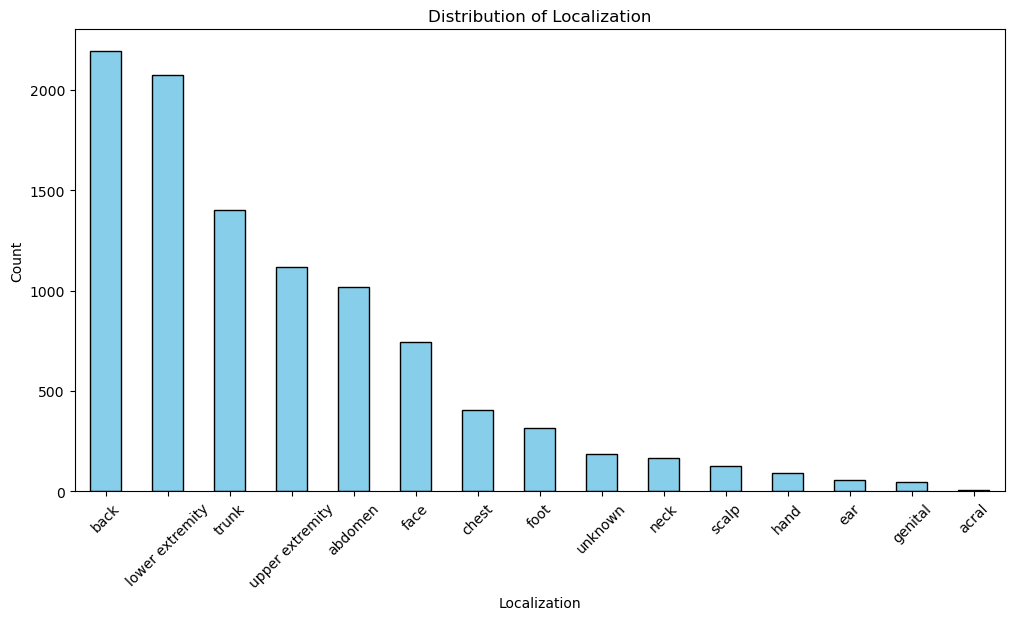

In [66]:
def plot_localization(meta_data):
    localization_counts = meta_data['localization'].value_counts()
    localization_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(12, 6))
    plt.xlabel('Localization')
    plt.ylabel('Count')
    plt.title('Distribution of Localization')
    plt.xticks(rotation=45)
    plt.show()

# Call the function with meta_data
plot_localization(meta_data)

In [67]:
def encode_localization(meta_data):
    meta_data['localization'] = meta_data['localization'].astype('category')
    meta_data['localization'] = meta_data['localization'].cat.codes
    return meta_data

encode_localization(meta_data)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_id,diagnosis
0,HAM_0000118,ISIC_0027419,2,histo,80.0,male,11,2,0
1,HAM_0000118,ISIC_0025030,2,histo,80.0,male,11,2,0
2,HAM_0002730,ISIC_0026769,2,histo,80.0,male,11,2,0
3,HAM_0002730,ISIC_0025661,2,histo,80.0,male,11,2,0
4,HAM_0001466,ISIC_0031633,2,histo,75.0,male,4,2,0
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,histo,40.0,male,0,0,1
10011,HAM_0002867,ISIC_0033550,0,histo,40.0,male,0,0,1
10012,HAM_0002867,ISIC_0033536,0,histo,40.0,male,0,0,1
10013,HAM_0000239,ISIC_0032854,0,histo,80.0,male,5,0,1


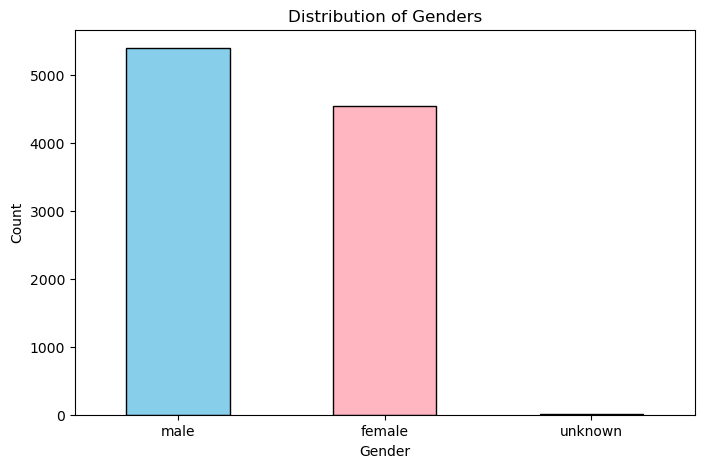

In [68]:
def plot_genders(meta_data):
    gender_counts = meta_data['sex'].value_counts()
    gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'], edgecolor='black', figsize=(8, 5))
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Distribution of Genders')
    plt.xticks(rotation=0)
    plt.show()

# Call the function with meta_data
plot_genders(meta_data)

In [69]:
def encode_gender(meta_data): 
    meta_data['sex'] = meta_data['sex'].astype('category')
    meta_data['sex'] = meta_data['sex'].cat.codes
    return meta_data

encode_gender(meta_data)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_id,diagnosis
0,HAM_0000118,ISIC_0027419,2,histo,80.0,1,11,2,0
1,HAM_0000118,ISIC_0025030,2,histo,80.0,1,11,2,0
2,HAM_0002730,ISIC_0026769,2,histo,80.0,1,11,2,0
3,HAM_0002730,ISIC_0025661,2,histo,80.0,1,11,2,0
4,HAM_0001466,ISIC_0031633,2,histo,75.0,1,4,2,0
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,histo,40.0,1,0,0,1
10011,HAM_0002867,ISIC_0033550,0,histo,40.0,1,0,0,1
10012,HAM_0002867,ISIC_0033536,0,histo,40.0,1,0,0,1
10013,HAM_0000239,ISIC_0032854,0,histo,80.0,1,5,0,1


Benign: bkl, df, nv, vasc

Malignant: akiec, bcc, mel

In [70]:
meta_data = meta_data.drop(columns=['lesion_id', 'image_id', 'dx_type', 'dx_id'])

X = meta_data.drop(columns=['dx'])
y = meta_data['dx']

meta_data.describe(include='all')


,dx,age,sex,localization,diagnosis
count,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000
mean,4.180860,51.863828,0.544286,6.946676,0.196023
std,1.460238,16.968614,0.500072,4.740686,0.397006
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,40.000000,0.000000,2.000000,0.000000
50%,5.000000,50.000000,1.000000,9.000000,0.000000
75%,5.000000,65.000000,1.000000,12.000000,0.000000
max,6.000000,85.000000,2.000000,14.000000,1.000000


In [71]:

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10


/opt/miniconda3/envs/kaggle/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0535 - loss: -359.6262 - val_accuracy: 0.0489 - val_loss: -4421.5913
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.0511 - loss: -9844.9199 - val_accuracy: 0.0489 - val_loss: -38952.9141
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.0530 - loss: -57703.8398 - val_accuracy: 0.0489 - val_loss: -139575.7969
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.0495 - loss: -179180.8125 - val_accuracy: 0.0489 - val_loss: -334209.3750
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.0506 - loss: -402162.2500 - val_accuracy: 0.0489 - val_loss: -642389.8750
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.0540 - loss: -735622.0000 - val_accuracy: 0.0489 - val_loss: -1079064.6250
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.0529 - loss: -1205583.1250 - val_accuracy: 0.0489 - val_loss: -1657223.0000
Epoch 8/10
218/218 ━━━━━━